In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
root_dir = "/workstation/raid/home/p170059cs/data_from_b170007ec/Programs/Bhanu/CERVICAL2.0/Classifier/Cervix/"
varients_no_aug = ["10_no_aug","15_no_aug","25_no_aug","50_no_aug","100_no_aug"]
varients_aug = ["10_aug","15_aug","25_aug","50_aug","100_aug"]

In [3]:
acc_no_aug = []
acc_aug = []
x = []
for i in range(len(varients_no_aug)):
    x.append(varients_aug[i][:-4])
    path_no_aug = root_dir + str(varients_no_aug[i]) + "/results_test.txt"
    path_aug = root_dir + str(varients_aug[i]) + "/results_test.txt"
    with open(path_no_aug) as f:
        contents = f.readlines()
        acc_no_aug.append(float(contents[0][9:-1]))
    with open(path_aug) as f:
        contents = f.readlines()
        acc_aug.append(float(contents[0][9:-1]))
path_no_cleaning = root_dir + "No-Cleaning/results.txt"
with open(path_no_cleaning) as f:
    contents = f.readlines()
    no_cleaning_acc = float(contents[0][9:-1])
    
path_manual_cleaning = root_dir + "Manual-Cleaning/results_test.txt"
with open(path_manual_cleaning) as f:
    contents = f.readlines()
    manual_cleaning_acc = float(contents[0][9:-1])

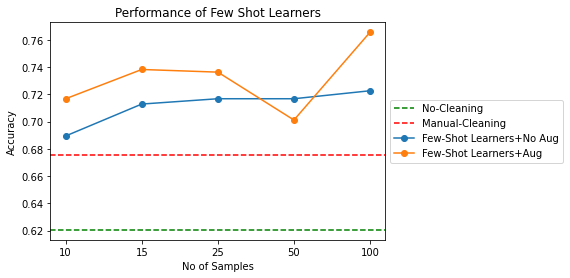

In [5]:
fig = plt.figure()
plt.axhline(y = no_cleaning_acc, color = 'green', linestyle = '--', label= "No-Cleaning")
plt.axhline(y = manual_cleaning_acc, color = 'red', linestyle = '--', label= "Manual-Cleaning")
plt.plot(x, acc_no_aug,marker='o', label = "Few-Shot Learners+No Aug")
plt.plot(x, acc_aug,marker='o', label = "Few-Shot Learners+Aug")

plt.xlabel("No of Samples")
plt.ylabel("Accuracy")
plt.title('Performance of Few Shot Learners')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Few Shot Learning Accuracies.png", bbox_inches='tight')
plt.show()